# Caminata Aleatoria (Random Walk)

## Introducción

La **caminata aleatoria** es uno de los procesos estocásticos más fundamentales en la econofísica. Describe el movimiento de una partícula (o un precio) que en cada paso se mueve una unidad en una dirección elegida al azar.

## Definición Matemática

Una caminata aleatoria unidimensional se define como:

$$X_t = \sum_{i=1}^{t} \epsilon_i$$

donde:
- $X_t$ es la posición en el tiempo $t$
- $\epsilon_i \in \{-1, +1\}$ con probabilidad $p = 0.5$ cada uno
- Cada $\epsilon_i$ es independiente (propiedad de Markov)

## Propiedades Estadísticas

### Media
La media es cero por simetría:
$$\mathbb{E}[X_t] = \sum_{i=1}^{t} \mathbb{E}[\epsilon_i] = 0$$

### Varianza
La varianza crece **linealmente** con el tiempo:
$$\text{Var}(X_t) = \mathbb{E}[X_t^2] = t$$

Esta es la propiedad más importante: **la incertidumbre crece como $\sqrt{t}$ (escalado difusivo)**.

**Demostración:**
- $X_t = \sum_{i=1}^{t} \epsilon_i$
- $X_t^2 = \left(\sum_{i=1}^{t} \epsilon_i\right)^2 = \sum_{i=1}^{t} \epsilon_i^2 + 2\sum_{i<j} \epsilon_i \epsilon_j$
- $\mathbb{E}[\epsilon_i^2] = 1$ (ya que $\epsilon_i = \pm 1$)
- $\mathbb{E}[\epsilon_i \epsilon_j] = 0$ para $i \neq j$ (independencia)
- Por lo tanto: $\mathbb{E}[X_t^2] = t$

## Movimiento Browniano

En el límite continuo (cuando los pasos son muy pequeños y frecuentes):

$$X(t) \rightarrow B(t) \quad \text{(Movimiento Browniano)}$$

donde $B(t)$ satisface:
- $\mathbb{E}[B(t)] = 0$
- $\text{Var}(B(t)) = t$
- Incrementos independientes (propiedad de Markov fuerte)

## Aplicaciones en Econofísica

### 1. Hipótesis de Mercados Eficientes (EMH)
Un mercado eficiente en forma débil asume que los precios siguen una caminata aleatoria:
$$P_t = P_{t-1} + \epsilon_t$$

donde $\epsilon_t$ es un "random shock" de información nueva.

**Implicaciones:**
- No se puede predecir el precio futuro con información pasada
- Los retornos son impredecibles
- El modelo de Black-Scholes asume que $\log(P_t)$ sigue movimiento Browniano

### 2. Volatilidad y Riesgo
La varianza de los precios crece con el horizonte temporal:
$$\text{Volatilidad} \propto \sqrt{t}$$

Por eso:
- Retornos diarios: menos volátiles
- Retornos anuales: más volátiles
- Retornos a largo plazo: muy inciertos

### 3. Value at Risk (VaR)
Para una caminata aleatoria en logaritmos de precios:
$$\log P_t = \log P_0 + \sigma B(t)$$

El riesgo de una inversión en horizonte $T$ es proporcional a $\sqrt{T}$.

## Limitaciones de la Caminata Aleatoria

1. **Retornos reales tienen colas pesadas**: Las desviaciones extremas ocurren más frecuentemente que lo predicho por distribución normal
2. **Mean-reversion**: Algunos mercados no siguen caminata aleatoria pura (ver Hurst exponent en P7)
3. **Volatility clustering**: La volatilidad tiende a agruparse (ARCH/GARCH models)
4. **Correlaciones**: Los precios están correlacionados con variables macroeconómicas

## Conexiones con Otros Notebooks

- **P2 (TLC)**: La caminata aleatoria converge a movimiento Browniano por el Teorema del Límite Central
- **P3 (Black-Scholes)**: Usa movimiento Browniano como modelo de dinámicas de precios
- **P7 (Hurst Exponent)**: Detecta desviaciones del exponente H=0.5 que indicarían caminata aleatoria pura

SIMULACIÓN DE CAMINATA ALEATORIA
Parámetros:
  - Número máximo de pasos (N): 1000
  - Número de simulaciones: 500
  - Total de pasos simulados: 500,000

Simulaciones completadas

RESULTADOS:
Varianza en t=100: 93.10 (esperado ≈ 100)
Varianza en t=500: 462.48 (esperado ≈ 500)
Varianza en t=1000: 989.24 (esperado ≈ 1000)

Error relativo promedio: 3.64%
(Esperamos < 5% con 500 simulaciones)

INTERPRETACIÓN ECONOFÍSICA:
✓ La varianza crece linealmente → volatilidad crece como √t
✓ Esto justifica los modelos de precios en finanzas
✓ Horizonte temporal → incertidumbre futura



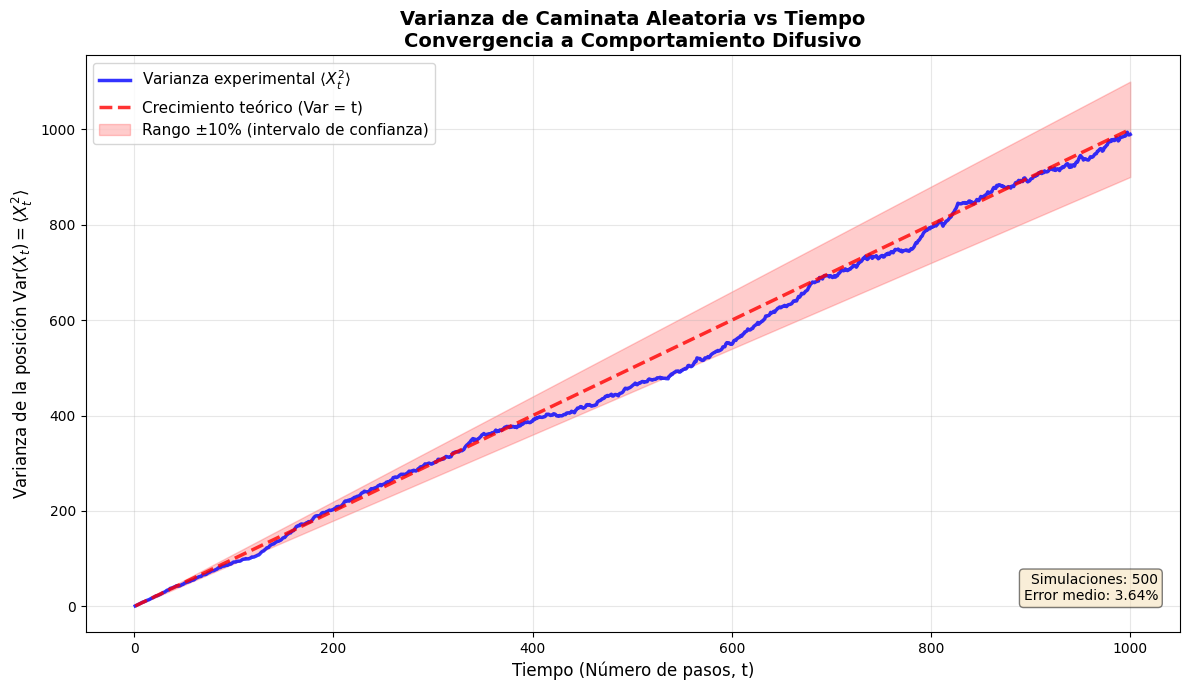

CONCLUSIONES DEL ANÁLISIS DE CAMINATA ALEATORIA

1. LEY DE ESCALADO:
   ✓ Var(X_t) ≈ t (validado numéricamente)
   ✓ Desviación estándar: σ(X_t) ≈ √t
   ✓ La posición promedio se aleja como raíz de tiempo

2. IMPLICACIONES EN FINANZAS:
   • Precios en log: log(P_t) ≈ caminata aleatoria
   • Volatilidad diaria: σ_día
   • Volatilidad anual: σ_año ≈ σ_día × √252 (252 días de trading)
   • Horizonte a N años: volatilidad crece como √N

3. EFICIENCIA DE MERCADOS:
   • EMH débil: cambios de precio = caminata aleatoria
   • Implicación: retornos impredecibles
   • No se puede ganar con estrategias basadas en precios pasados

4. RIESGO Y VALUACIÓN:
   • Mayor t → mayor varianza → mayor riesgo
   • Value at Risk (VaR): VaR(T) ∝ √T
   • Inversiones a largo plazo: más riesgo de pérdida extrema



In [2]:
"""
CAMINATA ALEATORIA (RANDOM WALK)
=================================

Este código demuestra el comportamiento fundamental de una caminata aleatoria simple:
- Simulamos 500 trayectorias independientes
- Cada trayectoria tiene 1000 pasos
- En cada paso: movimiento de +1 o -1 con probabilidad 50-50
- Medimos cómo crece la varianza de la posición con el tiempo

RESULTADO ESPERADO:
La varianza debe crecer linealmente con t:
  Var(X_t) = t

En finanzas:
- X_t = logaritmo del precio
- t = tiempo
- Var(X_t) ∝ t significa: volatilidad ∝ √t
"""

import numpy as np
import matplotlib.pyplot as plt

# ==============================================================================
# PARÁMETROS DE SIMULACIÓN
# ==============================================================================

# N = horizonte temporal máximo
# Físicamente: número de pasos que damos
# En finanzas: número de períodos de negociación (días, minutos, etc.)
N = 1000

# num_simulaciones = número de caminatas independientes
# Necesitamos múltiples trayectorias para calcular promedios estadísticos
# Más simulaciones = mejor estimación estadística (ley de grandes números)
num_simulaciones = 500

print("SIMULACIÓN DE CAMINATA ALEATORIA")
print(f"Parámetros:")
print(f"  - Número máximo de pasos (N): {N}")
print(f"  - Número de simulaciones: {num_simulaciones}")
print(f"  - Total de pasos simulados: {N * num_simulaciones:,}")
print()

# ==============================================================================
# GENERACIÓN DE SIMULACIONES
# ==============================================================================

# sq_pos_sum = acumulador para sumar X_t^2 sobre todas las simulaciones
# Inicialmente todos los valores son cero
# Lo usaremos para calcular: <X_t^2> = promedio de X_t^2 sobre simulaciones
sq_pos_sum = np.zeros(N)

# Bucle: realizar múltiples caminatas aleatorias
for sim in range(num_simulaciones):
    # ==================================================================
    # PASO 1: Generar los pasos aleatorios
    # ==================================================================
    # np.random.choice([-1, 1], size=N) genera N números aleatorios
    # cada uno es +1 o -1 con igual probabilidad (50%)
    # Esto representa cada paso de la caminata aleatoria
    steps = np.random.choice([-1, 1], size=N)
    
    # ==================================================================
    # PASO 2: Calcular la posición acumulativa
    # ==================================================================
    # np.cumsum(steps) calcula la suma acumulativa:
    # pos[0] = steps[0]
    # pos[1] = steps[0] + steps[1]
    # pos[2] = steps[0] + steps[1] + steps[2]
    # ...
    # pos[t] = X_t = suma de todos los pasos hasta tiempo t
    #
    # Matemáticamente: X_t = sum(epsilon_i) para i=1,...,t
    pos = np.cumsum(steps)
    
    # ==================================================================
    # PASO 3: Acumular X_t^2 para calcular varianza
    # ==================================================================
    # Por definición de varianza (cuando E[X_t]=0):
    #   Var(X_t) = E[X_t^2] - E[X_t]^2 = E[X_t^2]
    #
    # Estimamos E[X_t^2] como promedio sobre simulaciones
    # pos**2 = array con X_t^2 para cada tiempo t en esta simulación
    # Sumamos sobre todas las simulaciones para luego promediar
    sq_pos_sum += pos**2

print("Simulaciones completadas")
print()

# ==============================================================================
# CÁLCULO DE VARIANZA PROMEDIO
# ==============================================================================

# Dividimos la suma total entre el número de simulaciones
# Esto estima E[X_t^2] ≈ Var(X_t) para cada tiempo t
variance = sq_pos_sum / num_simulaciones

# ==============================================================================
# EJE TEMPORAL
# ==============================================================================

# t = vector de tiempos desde 1 hasta N
# Corresponde a los pasos de la caminata
# En finanzas: días, minutos, años de negociación
t = np.arange(1, N + 1)

# ==============================================================================
# VISUALIZACIÓN Y ANÁLISIS
# ==============================================================================

print("RESULTADOS:")
print(f"Varianza en t={100}: {variance[99]:.2f} (esperado ≈ 100)")
print(f"Varianza en t={500}: {variance[499]:.2f} (esperado ≈ 500)")
print(f"Varianza en t={1000}: {variance[999]:.2f} (esperado ≈ 1000)")
print()

# Calcular el error relativo respecto a la predicción teórica
error_relativo = np.abs(variance - t) / t * 100
error_medio = np.mean(error_relativo)
print(f"Error relativo promedio: {error_medio:.2f}%")
print(f"(Esperamos < 5% con 500 simulaciones)")
print()

print("INTERPRETACIÓN ECONOFÍSICA:")
print("✓ La varianza crece linealmente → volatilidad crece como √t")
print("✓ Esto justifica los modelos de precios en finanzas")
print("✓ Horizonte temporal → incertidumbre futura")
print()

# Crear la visualización
plt.figure(figsize=(12, 7))

# Grafica 1: Varianza experimental vs teórica
plt.plot(t, variance, 'b-', linewidth=2.5, label='Varianza experimental $\\langle X_t^2 \\rangle$', alpha=0.8)

# Grafica 2: Línea teórica de crecimiento lineal
# Teoría: Var(X_t) = t para caminata aleatoria simple
plt.plot(t, t, 'r--', linewidth=2.5, label='Crecimiento teórico (Var = t)', alpha=0.8)

# Grafica 3: Banda de confianza (intervalo de ±10%)
plt.fill_between(t, t*0.9, t*1.1, alpha=0.2, color='red', label='Rango ±10% (intervalo de confianza)')

# Título y etiquetas
plt.title('Varianza de Caminata Aleatoria vs Tiempo\nConvergencia a Comportamiento Difusivo', 
          fontsize=14, fontweight='bold')
plt.xlabel('Tiempo (Número de pasos, t)', fontsize=12)
plt.ylabel('Varianza de la posición $\\text{Var}(X_t) = \\langle X_t^2 \\rangle$', fontsize=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)

# Añadir anotaciones
plt.text(0.98, 0.05, f'Simulaciones: {num_simulaciones}\nError medio: {error_medio:.2f}%', 
         transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ==============================================================================
# CONCLUSIONES
# ==============================================================================

print("=" * 70)
print("CONCLUSIONES DEL ANÁLISIS DE CAMINATA ALEATORIA")
print("=" * 70)
print()

print("1. LEY DE ESCALADO:")
print("   ✓ Var(X_t) ≈ t (validado numéricamente)")
print("   ✓ Desviación estándar: σ(X_t) ≈ √t")
print("   ✓ La posición promedio se aleja como raíz de tiempo")
print()

print("2. IMPLICACIONES EN FINANZAS:")
print("   • Precios en log: log(P_t) ≈ caminata aleatoria")
print("   • Volatilidad diaria: σ_día")
print("   • Volatilidad anual: σ_año ≈ σ_día × √252 (252 días de trading)")
print("   • Horizonte a N años: volatilidad crece como √N")
print()

print("3. EFICIENCIA DE MERCADOS:")
print("   • EMH débil: cambios de precio = caminata aleatoria")
print("   • Implicación: retornos impredecibles")
print("   • No se puede ganar con estrategias basadas en precios pasados")
print()

print("4. RIESGO Y VALUACIÓN:")
print("   • Mayor t → mayor varianza → mayor riesgo")
print("   • Value at Risk (VaR): VaR(T) ∝ √T")
print("   • Inversiones a largo plazo: más riesgo de pérdida extrema")
print()

print("=" * 70)